In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [73]:
crop_data = pd.read_csv("crop_production.csv",index_col="index")

In [74]:
crop_data.head()

State_Name District_Name  Crop_Year       Season  \
index                                                                      
0      Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1      Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2      Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3      Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4      Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                      Crop    Area  Production  
index                                           
0                 Arecanut  1254.0      2000.0  
1      Other Kharif pulses     2.0         1.0  
2                     Rice   102.0       321.0  
3                   Banana   176.0       641.0  
4                Cashewnut   720.0       165.0

In [75]:
crop_data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [76]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.0+ MB


### Remove the null object from the dataframe

In [77]:
crop_data.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [78]:
threshold = len(crop_data) * 0.5

cols_to_drop = crop_data.columns[crop_data.isna().sum() <= threshold]
print(cols_to_drop)

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


In [79]:
#drop datas which is less than thresshold

crop_data.dropna(subset=cols_to_drop,inplace=True)
crop_data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [80]:
crop_data['Crop_Year'] = crop_data['Crop_Year'].astype(str)
crop_data.dtypes

State_Name        object
District_Name     object
Crop_Year         object
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [81]:
crop_data['Year'] = pd.to_datetime(crop_data['Crop_Year'],format='%Y')
crop_data['Year'] = crop_data['Year'].dt.year

In [82]:
crop_data.drop(columns="Crop_Year",inplace=True)

## Data Distribution

In [83]:
crop_data.select_dtypes("object").describe()

State_Name District_Name       Season    Crop
count          242361        242361       242361  242361
unique             33           646            6     124
top     Uttar Pradesh        TUMKUR  Kharif         Rice
freq            33189           931        94283   15082

In [84]:
crop_data.describe()

Area    Production           Year
count  2.423610e+05  2.423610e+05  242361.000000
mean   1.216741e+04  5.825034e+05    2005.625773
std    5.085744e+04  1.706581e+07       4.958285
min    1.000000e-01  0.000000e+00    1997.000000
25%    8.700000e+01  8.800000e+01    2002.000000
50%    6.030000e+02  7.290000e+02    2006.000000
75%    4.545000e+03  7.023000e+03    2010.000000
max    8.580100e+06  1.250800e+09    2015.000000

## filter the data specif to Rice

In [85]:
filt = crop_data['Crop'] == "Rice"

Rice_data = crop_data[filt]

Rice_data['P/A'] = Rice_data["Production"]/Rice_data["Area"]
Rice_data.head()

State_Name District_Name       Season  Crop    Area  \
index                                                                         
2      Andaman and Nicobar Islands      NICOBARS  Kharif       Rice  102.00   
12     Andaman and Nicobar Islands      NICOBARS  Kharif       Rice   83.00   
18     Andaman and Nicobar Islands      NICOBARS  Kharif       Rice  189.20   
27     Andaman and Nicobar Islands      NICOBARS  Kharif       Rice   52.00   
36     Andaman and Nicobar Islands      NICOBARS  Kharif       Rice   52.94   

       Production  Year       P/A  
index                              
2          321.00  2000  3.147059  
12         300.00  2001  3.614458  
18         510.84  2002  2.700000  
27          90.17  2003  1.734038  
36          72.57  2004  1.370797

In [86]:
Rice_data.sort_values(by="P/A",ascending=False)

Rice_data.drop(index=130528,inplace=True)

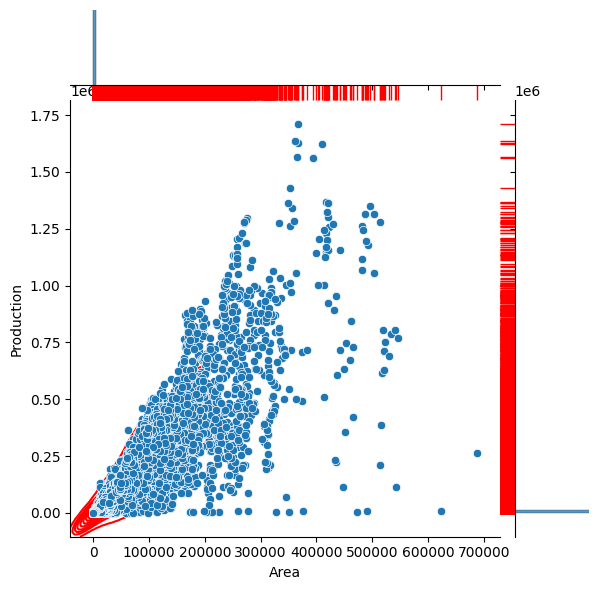

In [87]:


ax = sns.jointplot(data= Rice_data,x="Area",y="Production")
ax.plot_joint(sns.kdeplot,color='r',zorder=0)
ax.plot_marginals(sns.rugplot,color='r',height=-0.2,clip_on=False)

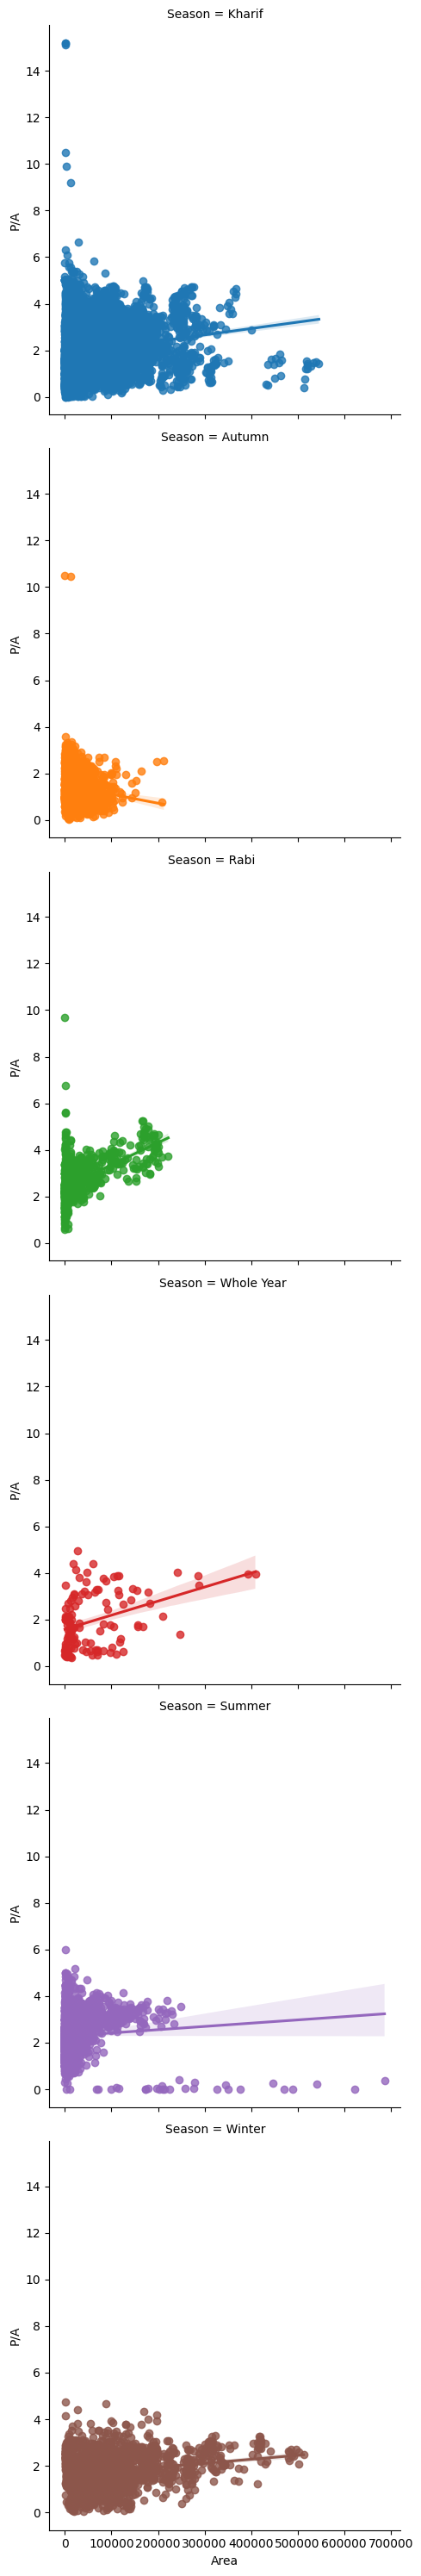

In [88]:
g = sns.lmplot(data=Rice_data,x="Area",y="P/A",hue="Season",row="Season")
plt.show()

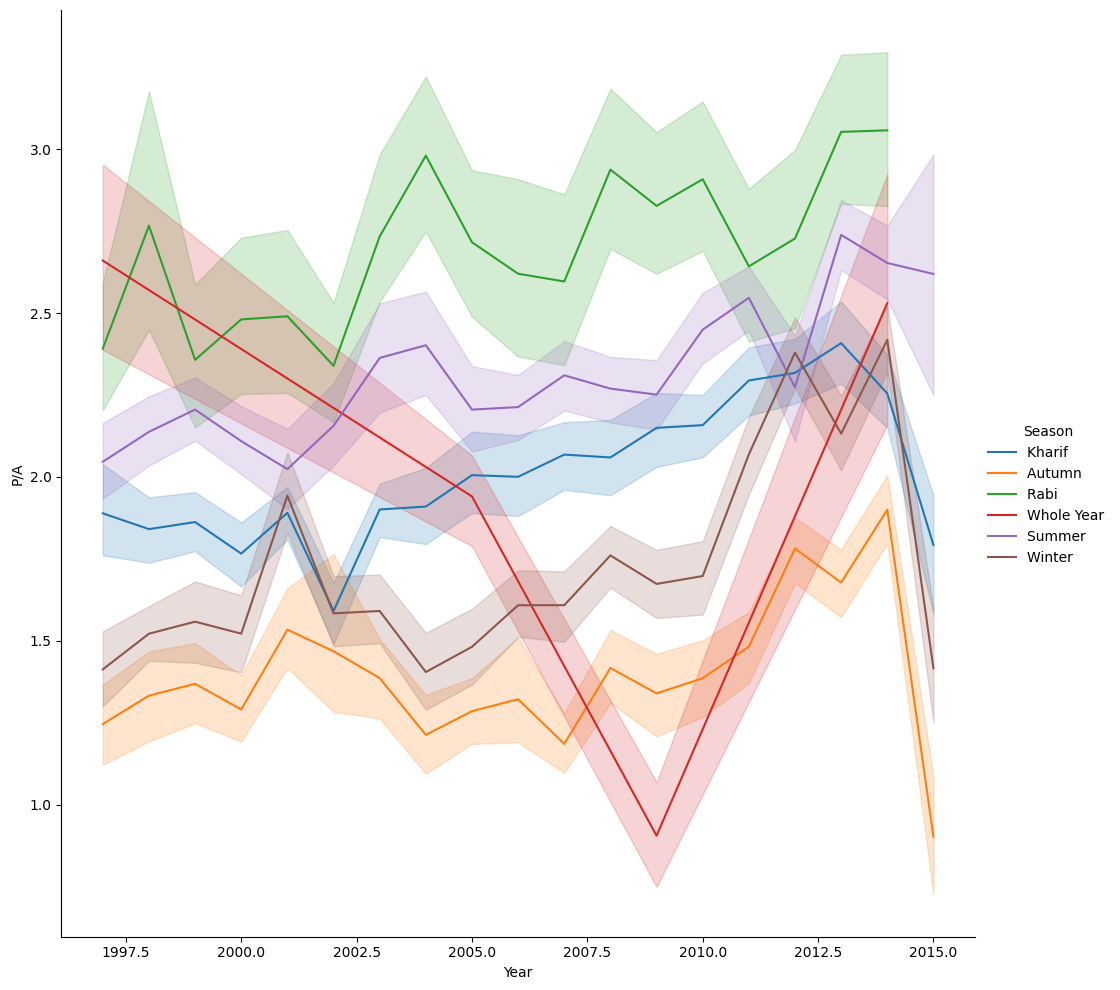

In [89]:

sns.relplot(data=Rice_data,x="Year",y="P/A",kind="line",hue="Season",height=10,legend="full")
plt.show()

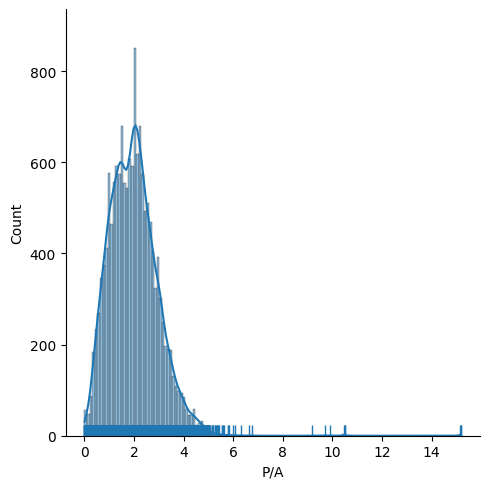

In [91]:
sns.displot(data=Rice_data,x="P/A",kde=True,rug=True)

## removing the outlier data 

In [92]:
#identifying the outliers
seventy_fith = Rice_data["P/A"].quantile(0.75)
twentry_fifth = Rice_data["P/A"].quantile(0.25)

rice_iqr = seventy_fith - twentry_fifth

upper = seventy_fith + (1.5 * rice_iqr)
lower = twentry_fifth - (1.5 * rice_iqr)

print(upper,lower)



4.500017494113161 -0.6601408742619135


In [93]:
#oulier data
Rice_data[(Rice_data['P/A']< lower) | (Rice_data['P/A'] > upper)]

State_Name     District_Name       Season  Crop  \
index                                                                      
45      Andaman and Nicobar Islands          NICOBARS  Kharif       Rice   
1945                 Andhra Pradesh     EAST GODAVARI  Rabi         Rice   
1989                 Andhra Pradesh     EAST GODAVARI  Rabi         Rice   
2045                 Andhra Pradesh     EAST GODAVARI  Rabi         Rice   
2100                 Andhra Pradesh     EAST GODAVARI  Rabi         Rice   
...                             ...               ...          ...   ...   
189682                   Tamil Nadu         TUTICORIN  Kharif       Rice   
190199                   Tamil Nadu           VELLORE  Kharif       Rice   
190694                   Tamil Nadu        VILLUPURAM  Kharif       Rice   
191005                   Tamil Nadu      VIRUDHUNAGAR  Kharif       Rice   
235888                  Uttarakhand  UDAM SINGH NAGAR  Summer       Rice   

             Area  Production  Year       P/A  
index                                          
45           2.09       12.06  2005  5.770335  
1945    165779.00   750150.00  2001  4.525000  
1989    106427.00   491906.00  2002  4.622004  
2045    165321.00   869092.00  2003  5.256997  
2100    162903.00   766296.00  2004  4.704002  
...           ...         ...   ...       ...  
189682   11730.00    55451.00  2013  4.727280  
190199   39366.00   192496.00  2013  4.889905  
190694  170443.00   796608.00  2013  4.673750  
191005   32735.00   158214.00  2006  4.833176  
235888    8844.00    42265.00  2005  4.778946  

[153 rows x 8 columns]

In [94]:
#clean data after removing outlier
Rice = Rice_data[(Rice_data['P/A'] > lower) | (Rice_data['P/A'] < upper)]

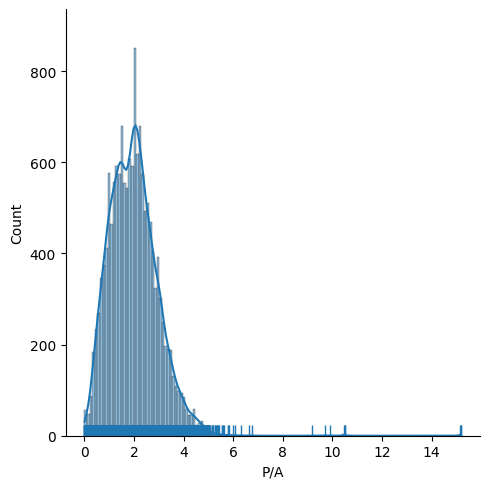

In [95]:
sns.displot(data=Rice_data,x="P/A",kde=True,rug=True)

In [155]:
sns.set(font_scale=4)
sns.set_style("whitegrid")
plt.figure(figsize=(30, 90))
sns.catplot(data=Rice_data,y="State_Name",x="Area",hue="Season",row="Season",kind="box",height=90)
plt.xticks(rotation=90)
plt.title("Rice Farming Areas in Indian states season wise")
plt.show()

<Figure size 3000x9000 with 0 Axes>

<Axes: >

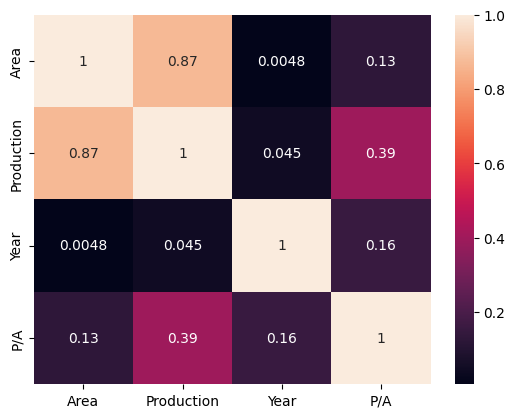

In [96]:
sns.heatmap(data=Rice.corr(),annot=True)

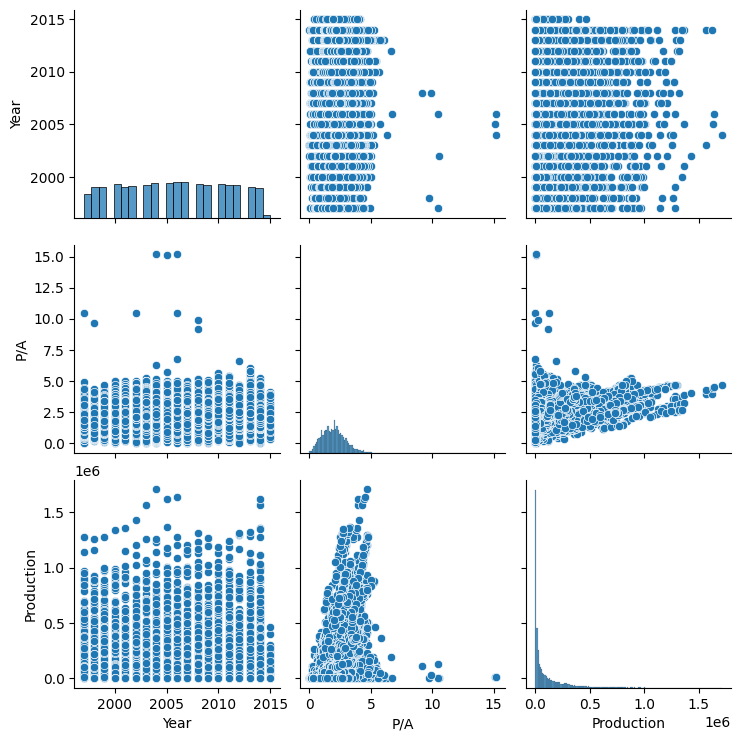

In [97]:
sns.pairplot(data=Rice,vars=["Year","P/A","Production"])

In [98]:
Rice["mean_p/a"] = Rice.groupby("Season")["P/A"].transform(lambda x : x.mean())

In [99]:
#create catagorical data from Area size

labels = ["small","medium","large","xlarge"]

twenty = Rice['Area'].quantile(0.25)
medium = Rice['Area'].median()
seventy = Rice['Area'].quantile(0.75)
max = Rice['Area'].max()
bins = [0,twenty,medium,seventy,max]

Rice['Area cat'] = pd.cut(Rice['Area'],labels=labels,bins=bins)

Rice.head()

State_Name District_Name       Season  Crop    Area  \
index                                                                         
2      Andaman and Nicobar Islands      NICOBARS  Kharif       Rice  102.00   
12     Andaman and Nicobar Islands      NICOBARS  Kharif       Rice   83.00   
18     Andaman and Nicobar Islands      NICOBARS  Kharif       Rice  189.20   
27     Andaman and Nicobar Islands      NICOBARS  Kharif       Rice   52.00   
36     Andaman and Nicobar Islands      NICOBARS  Kharif       Rice   52.94   

       Production  Year       P/A  mean_p/a Area cat  
index                                                 
2          321.00  2000  3.147059  2.007862    small  
12         300.00  2001  3.614458  2.007862    small  
18         510.84  2002  2.700000  2.007862    small  
27          90.17  2003  1.734038  2.007862    small  
36          72.57  2004  1.370797  2.007862    small

In [100]:
Karnataka = Rice[(Rice["State_Name"] == "Karnataka")]
Karnataka.head()

State_Name District_Name       Season  Crop   Area  Production  Year  \
index                                                                        
76877  Karnataka      BAGALKOT  Kharif       Rice  197.0       316.0  1998   
76912  Karnataka      BAGALKOT  Kharif       Rice  128.0       202.0  1999   
76951  Karnataka      BAGALKOT  Kharif       Rice  171.0       311.0  2000   
76992  Karnataka      BAGALKOT  Kharif       Rice  171.0       411.0  2001   
77008  Karnataka      BAGALKOT  Summer       Rice   13.0        19.0  2001   

            P/A  mean_p/a Area cat  
index                               
76877  1.604061  2.007862    small  
76912  1.578125  2.007862    small  
76951  1.818713  2.007862    small  
76992  2.403509  2.007862    small  
77008  1.461538  2.303841    small

In [101]:
Karnataka["Mean value"] = Karnataka["Season"] + Karnataka["mean_p/a"].astype('str')

Karnataka.head()

State_Name District_Name       Season  Crop   Area  Production  Year  \
index                                                                        
76877  Karnataka      BAGALKOT  Kharif       Rice  197.0       316.0  1998   
76912  Karnataka      BAGALKOT  Kharif       Rice  128.0       202.0  1999   
76951  Karnataka      BAGALKOT  Kharif       Rice  171.0       311.0  2000   
76992  Karnataka      BAGALKOT  Kharif       Rice  171.0       411.0  2001   
77008  Karnataka      BAGALKOT  Summer       Rice   13.0        19.0  2001   

            P/A  mean_p/a Area cat                     Mean value  
index                                                              
76877  1.604061  2.007862    small  Kharif     2.0078621128849026  
76912  1.578125  2.007862    small  Kharif     2.0078621128849026  
76951  1.818713  2.007862    small  Kharif     2.0078621128849026  
76992  2.403509  2.007862    small  Kharif     2.0078621128849026  
77008  1.461538  2.303841    small  Summer     2.3038408626516413

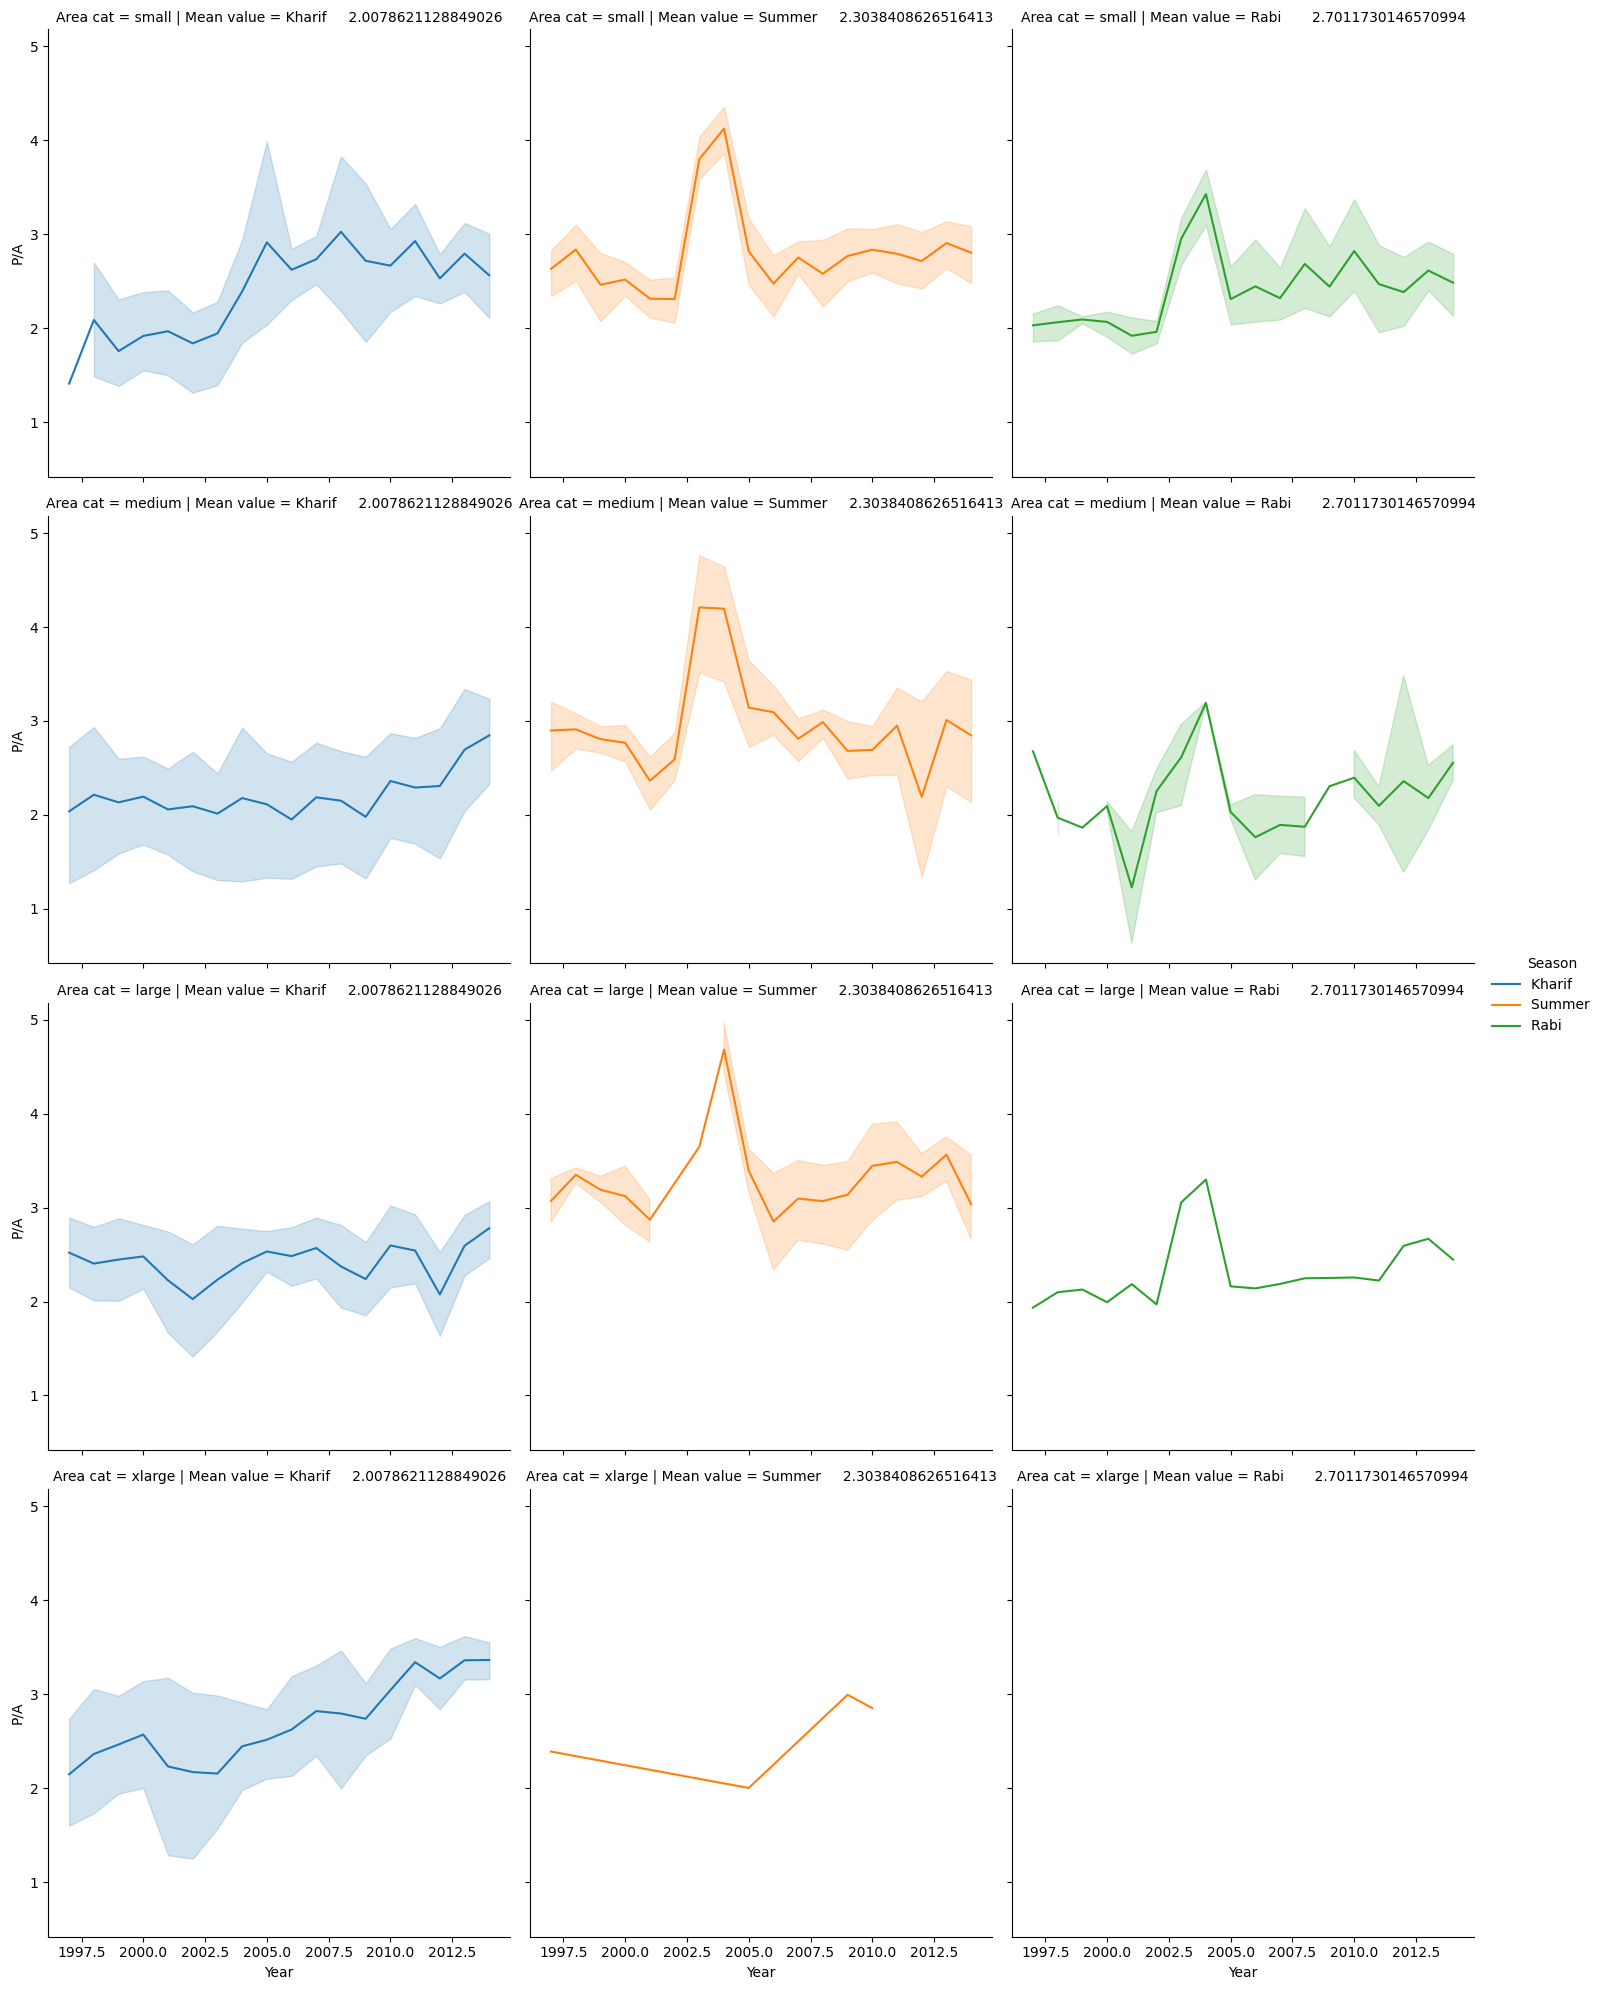

In [102]:
sns.relplot(data=Karnataka,x="Year",y="P/A",kind="line",hue="Season",col="Mean value",markers="Season",row="Area cat")
plt.show()

Text(0.5, 1.0, 'Rice production/Area in Karnataka based on seasons')

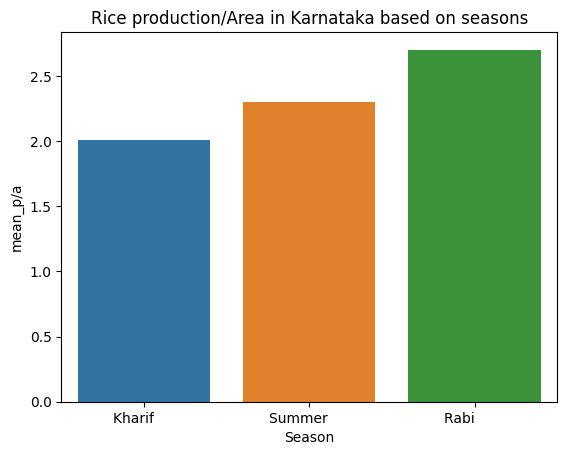

In [103]:
sns.barplot(data=Karnataka,x="Season",y="mean_p/a",)
plt.title("Rice production/Area in Karnataka based on seasons")

Text(0.5, 1.0, 'Rice Prodiction in Karnataka District wise data')

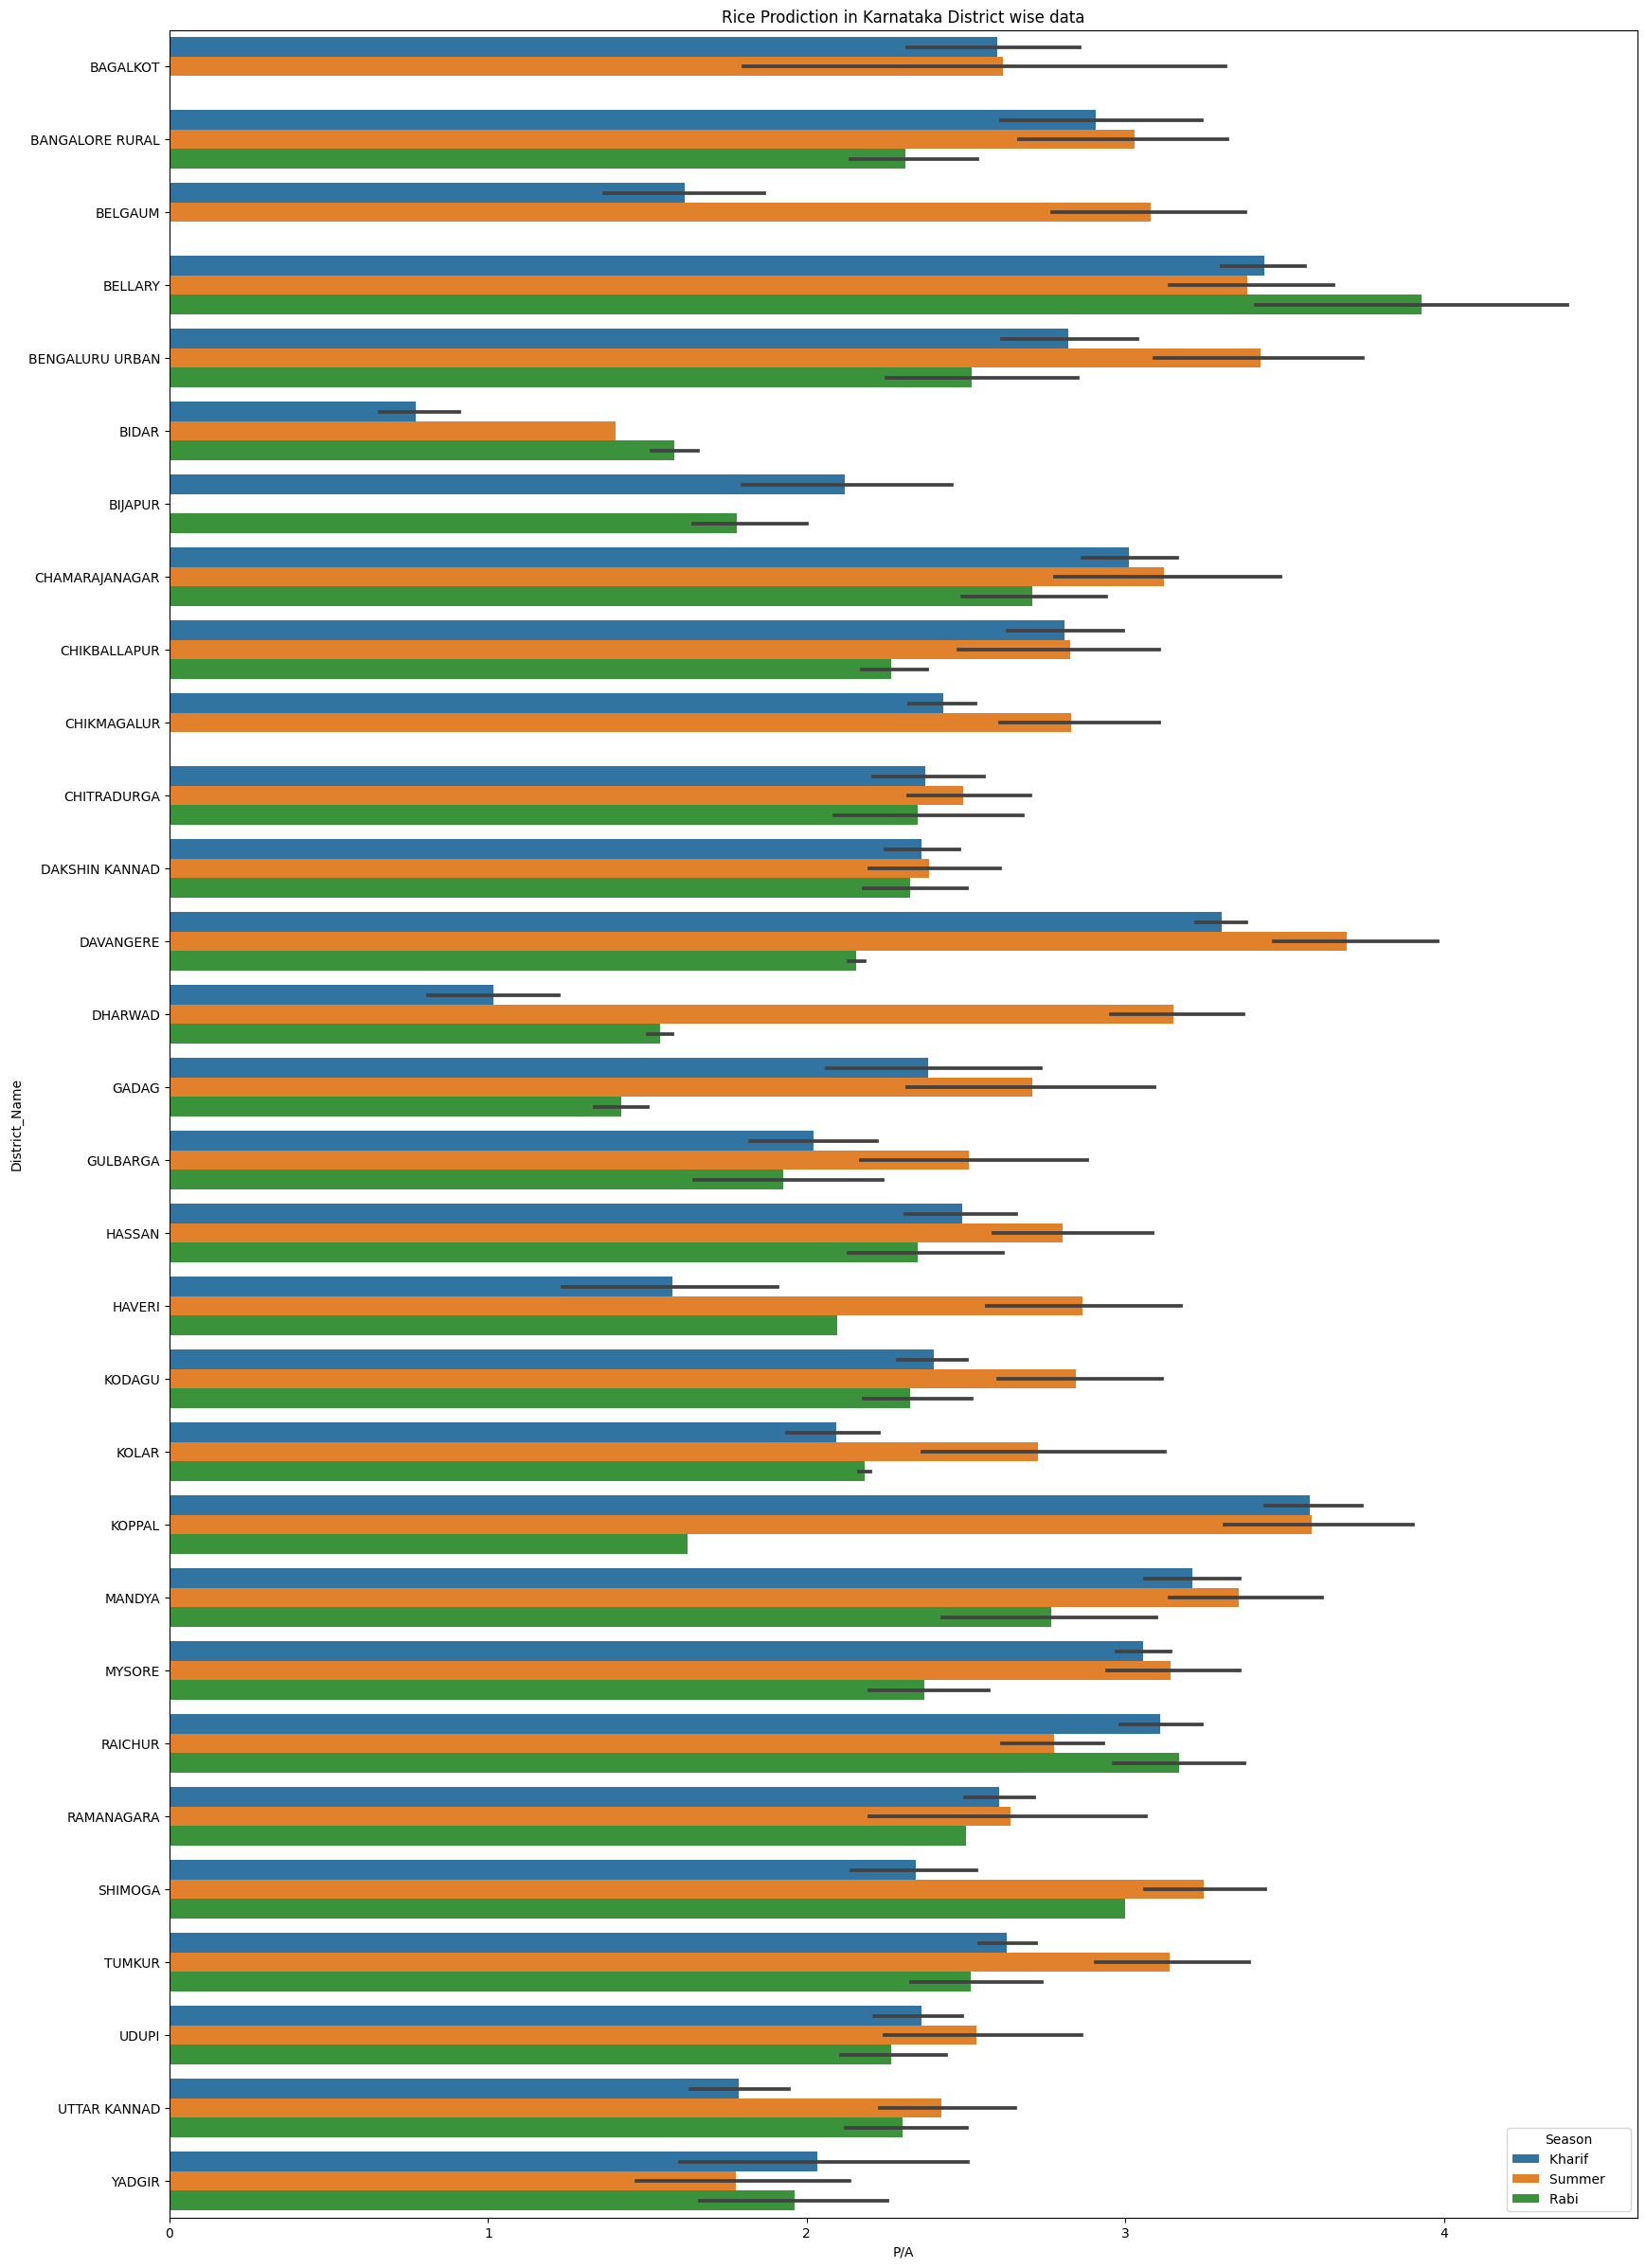

In [104]:
fig, ax = plt.subplots(figsize =(20,30))
sns.barplot(data=Karnataka,x="P/A",y="District_Name",hue="Season")
plt.title("Rice Prodiction in Karnataka District wise data")

In [105]:
Karnataka.head()

State_Name District_Name       Season  Crop   Area  Production  Year  \
index                                                                        
76877  Karnataka      BAGALKOT  Kharif       Rice  197.0       316.0  1998   
76912  Karnataka      BAGALKOT  Kharif       Rice  128.0       202.0  1999   
76951  Karnataka      BAGALKOT  Kharif       Rice  171.0       311.0  2000   
76992  Karnataka      BAGALKOT  Kharif       Rice  171.0       411.0  2001   
77008  Karnataka      BAGALKOT  Summer       Rice   13.0        19.0  2001   

            P/A  mean_p/a Area cat                     Mean value  
index                                                              
76877  1.604061  2.007862    small  Kharif     2.0078621128849026  
76912  1.578125  2.007862    small  Kharif     2.0078621128849026  
76951  1.818713  2.007862    small  Kharif     2.0078621128849026  
76992  2.403509  2.007862    small  Kharif     2.0078621128849026  
77008  1.461538  2.303841    small  Summer     2.3038408626516413

<Axes: xlabel='P/A', ylabel='District_Name'>

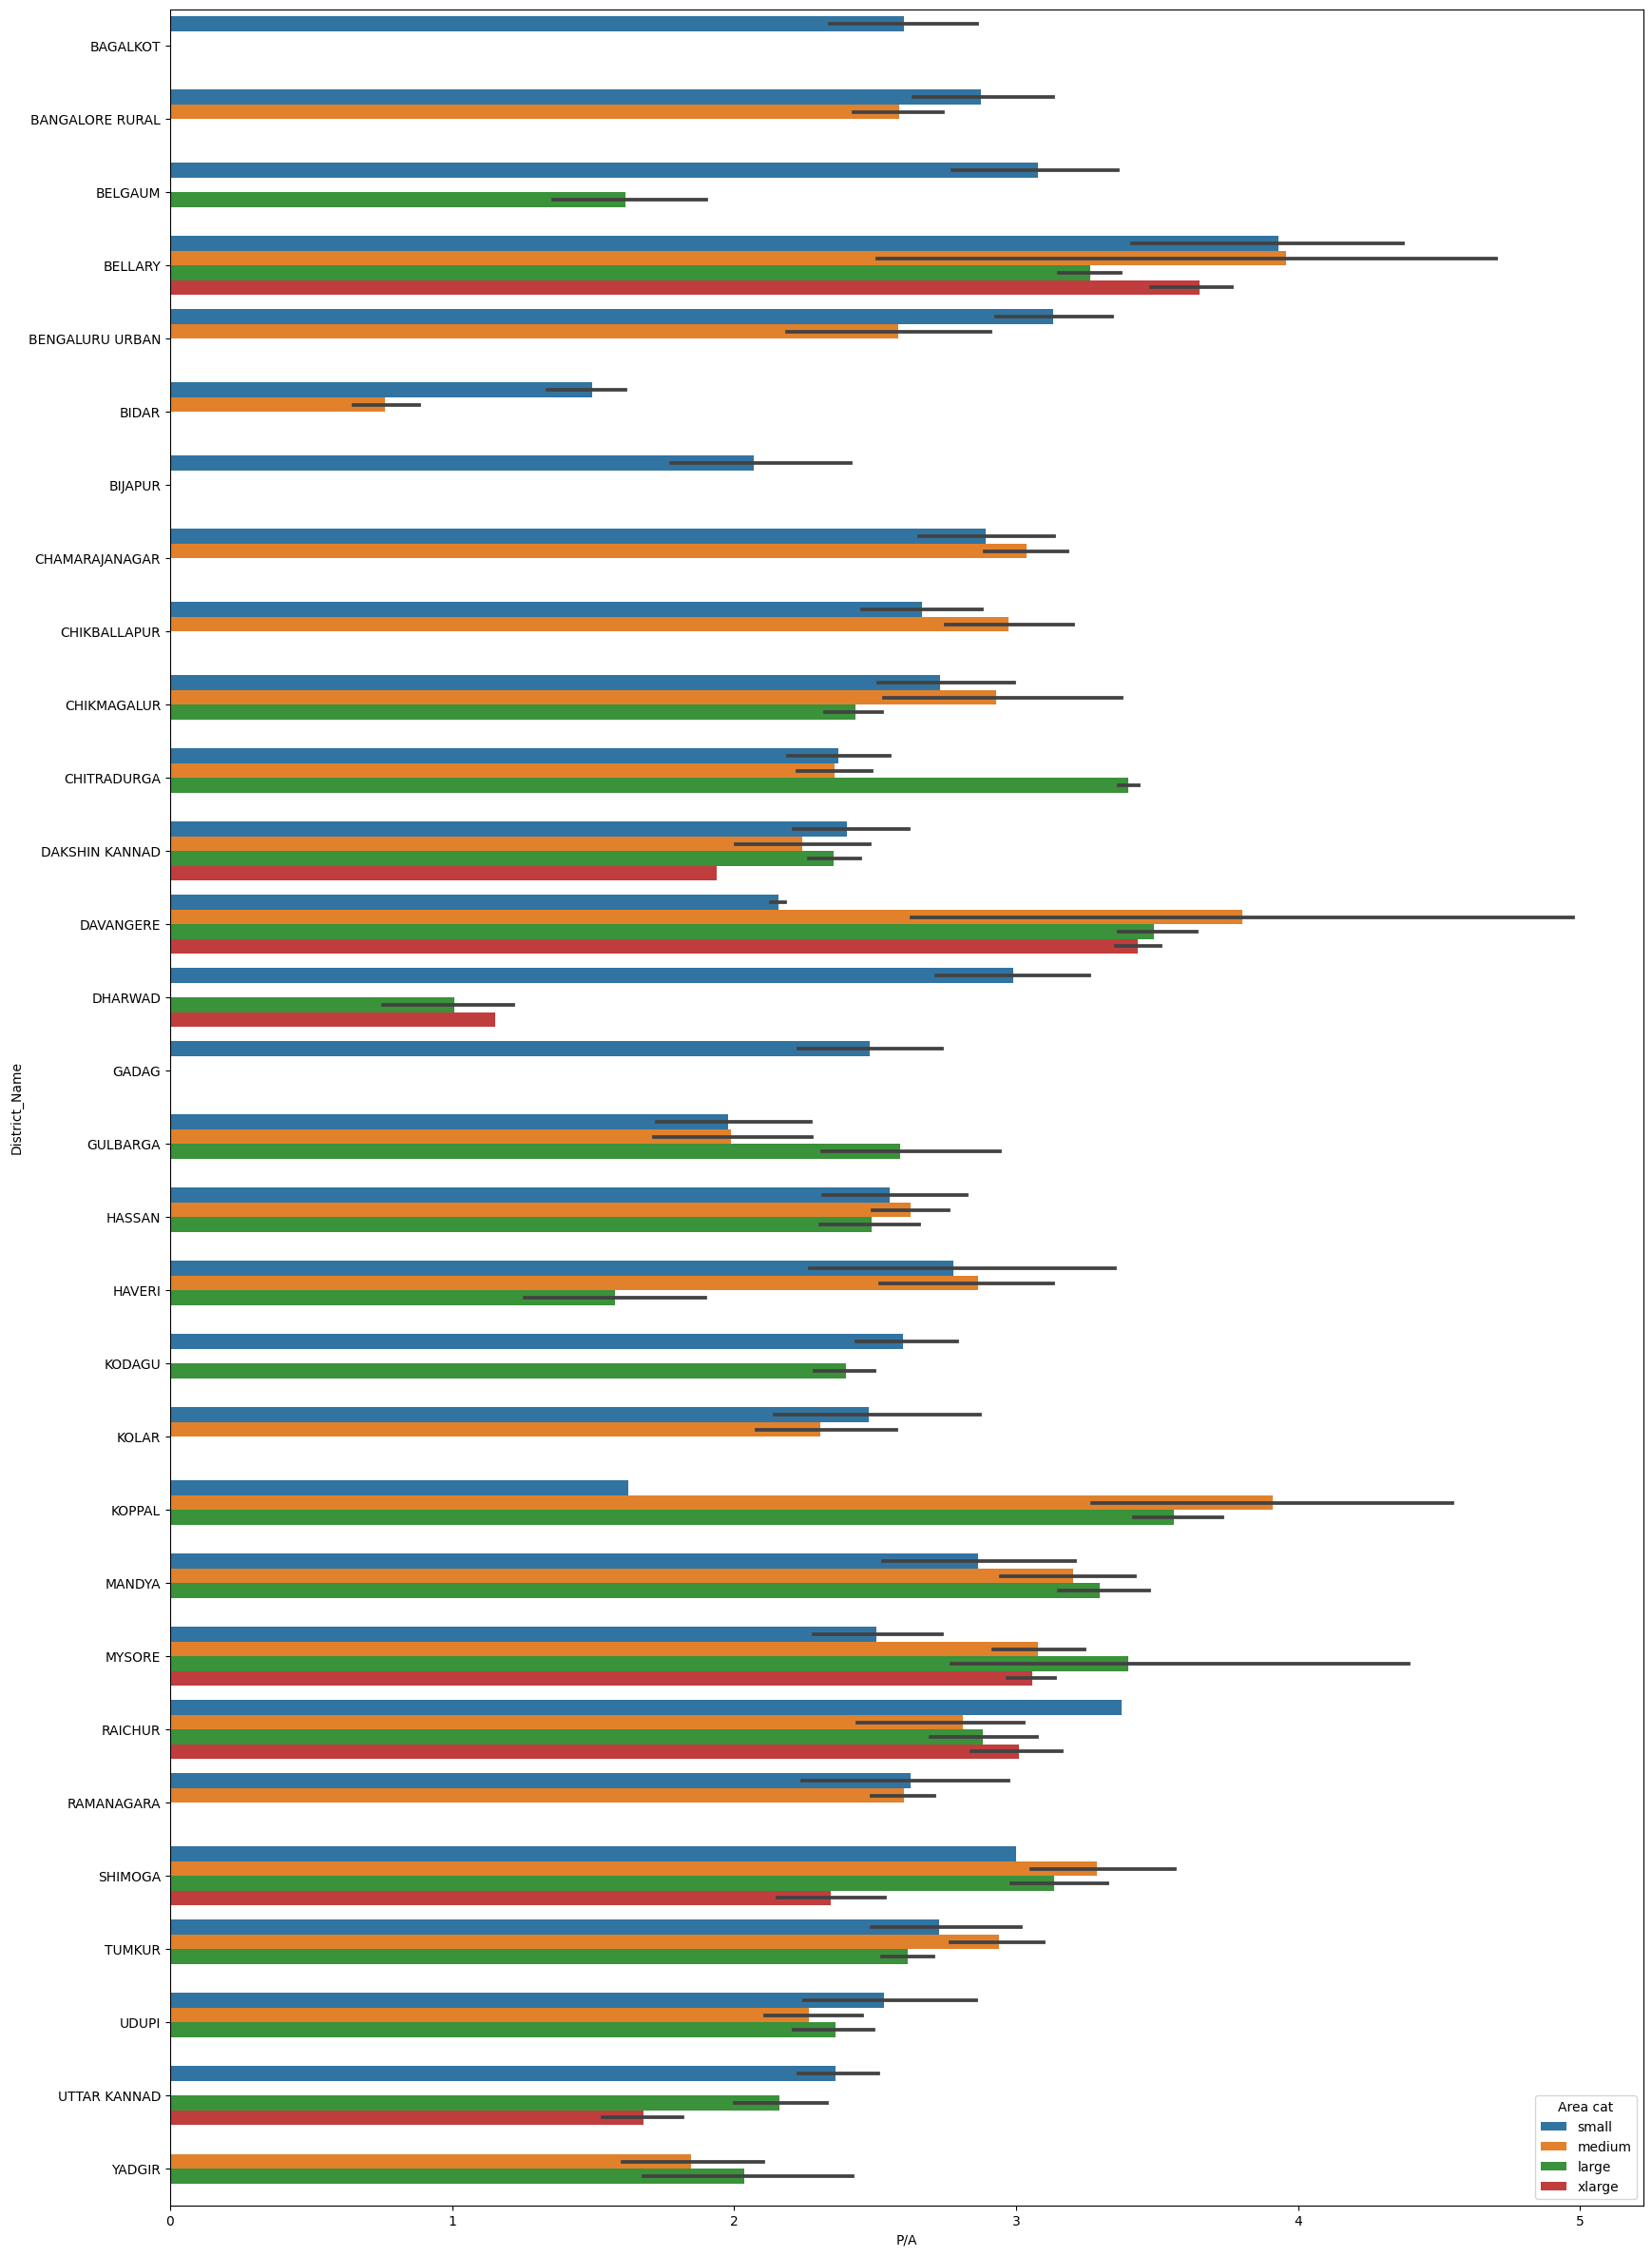

In [106]:
#Rice Farming distribution across Karantaka districts

fig, ax = plt.subplots(figsize =(20,30))
sns.barplot(data=Karnataka,x="P/A",y="District_Name",hue="Area cat")

In [127]:
##Ploting the same details for tamilnadu

TN = Rice[(Rice["State_Name"] == "Tamil Nadu")]
TN.head()

State_Name District_Name       Season  Crop     Area  Production  \
index                                                                      
177690  Tamil Nadu      ARIYALUR  Kharif       Rice  25978.0     80462.0   
177721  Tamil Nadu      ARIYALUR  Kharif       Rice  25211.0     97869.0   
177731  Tamil Nadu      ARIYALUR  Kharif       Rice  24097.0     97257.0   
177761  Tamil Nadu      ARIYALUR  Kharif       Rice  17523.0     36392.0   
177775  Tamil Nadu      ARIYALUR  Kharif       Rice  24437.0    131658.0   

        Year       P/A  mean_p/a Area cat  
index                                      
177690  2009  3.097313  2.007862    large  
177721  2010  3.881996  2.007862    large  
177731  2011  4.036063  2.007862    large  
177761  2012  2.076813  2.007862   medium  
177775  2013  5.387650  2.007862    large

In [138]:
#fuction to plot analysis for different states

def plotfucntion (dt):
    """plots different functions for given data frame"""
    

    df["Mean value"] = df["Season"] + df["mean_p/a"].astype('str')

    #plot Season wise production for different season over the years
    sns.relplot(data=df,x="Year",y="P/A",kind="line",hue="Season",col="Mean value",markers="Season",row="Area cat")
    plt.show()

    #plot barplot of seasons 
    sns.barplot(data=df,x="Season",y="P/A",)
    plt.title(f"Rice production/Area in based on seasons")
    plt.show()

    #plot district wise production
    fig, ax = plt.subplots(figsize =(20,30))
    sns.barplot(data=df,x="P/A",y="District_Name",hue="Season")
    plt.title(f"Rice Prodiction in District wise data")
    plt.show()

    #Rice Farming distribution across Karantaka districts

    fig, ay = plt.subplots(figsize =(20,30))
    sns.barplot(data=df,x="P/A",y="District_Name",hue="Area cat")
    plt.title("Rice farming Area distribution across the state")

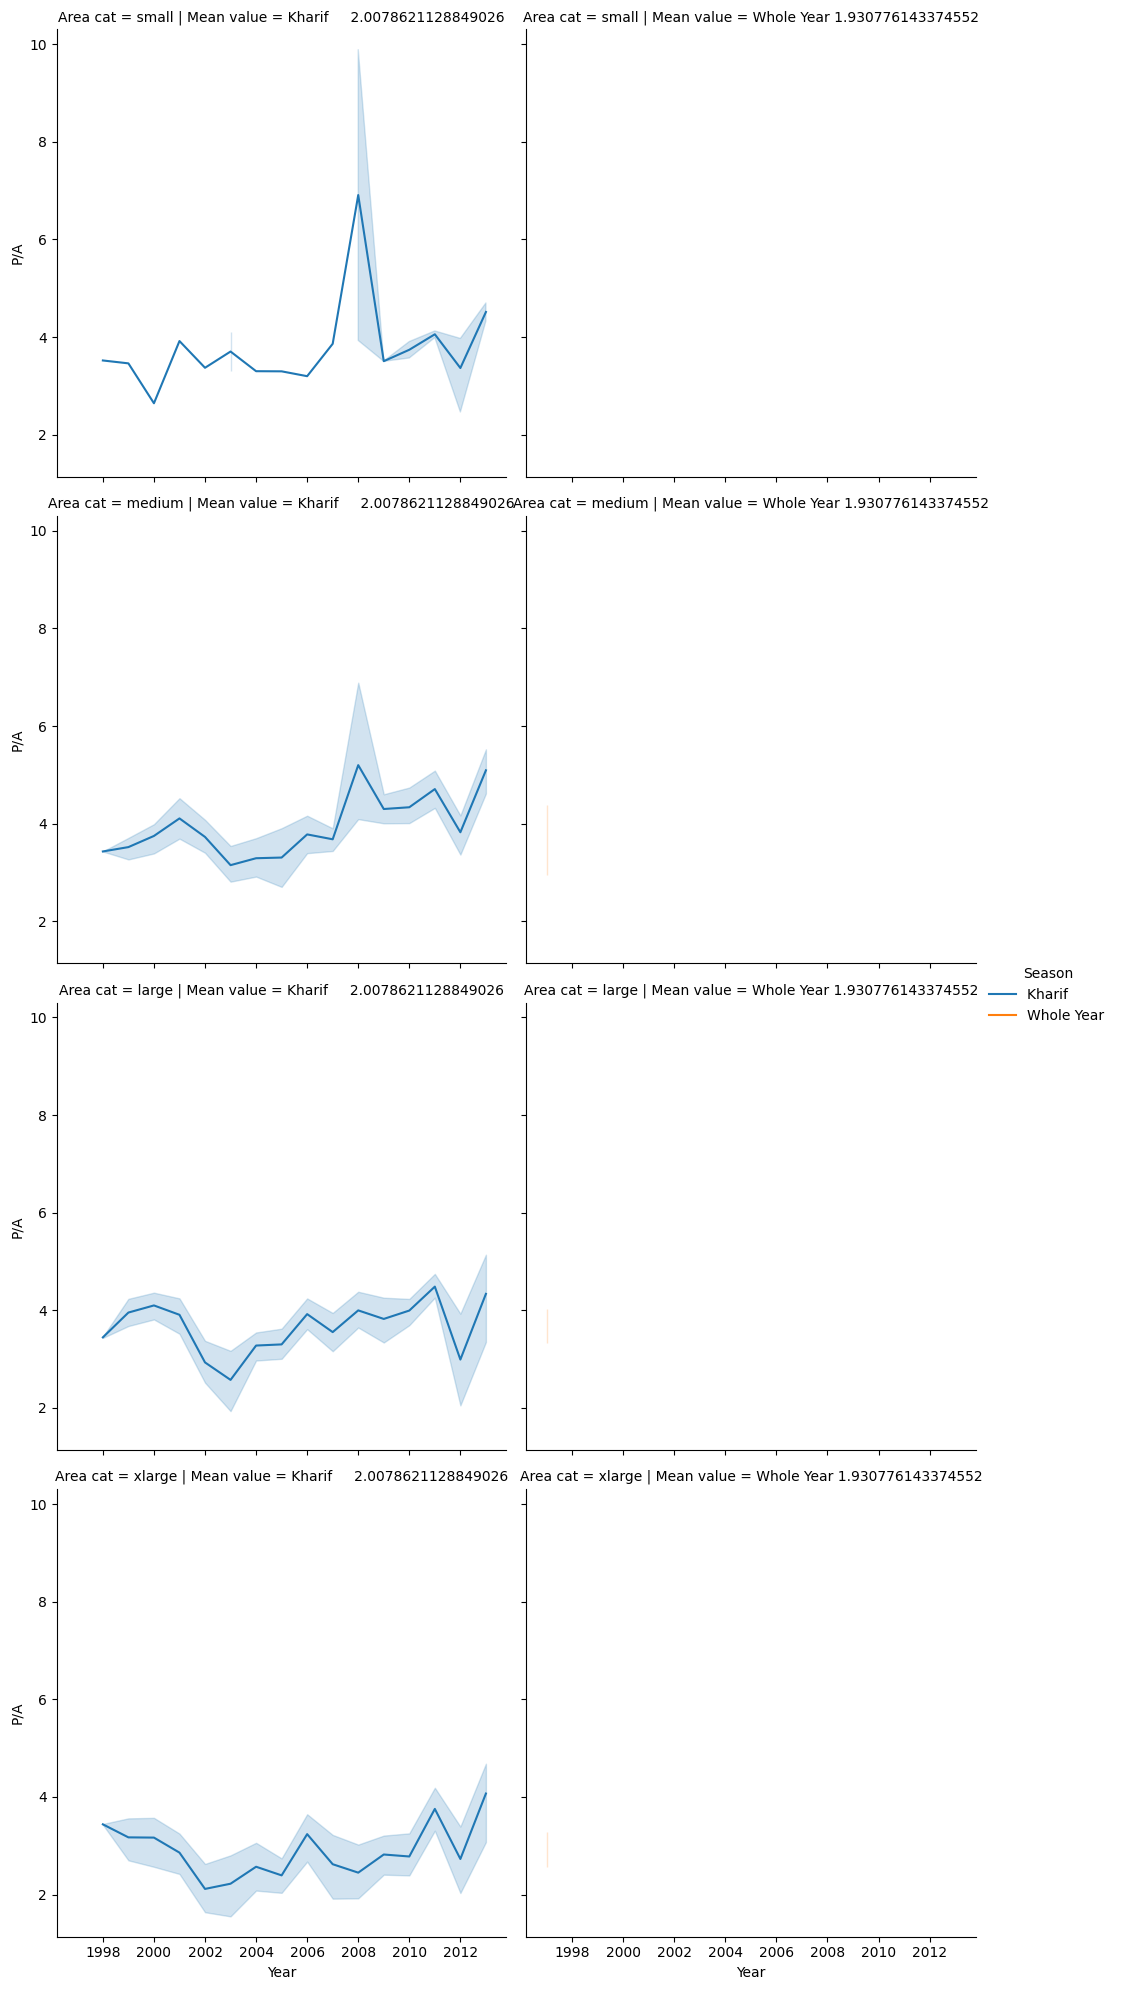

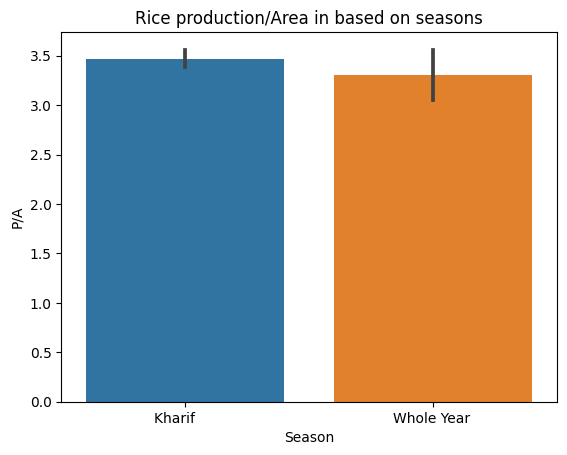

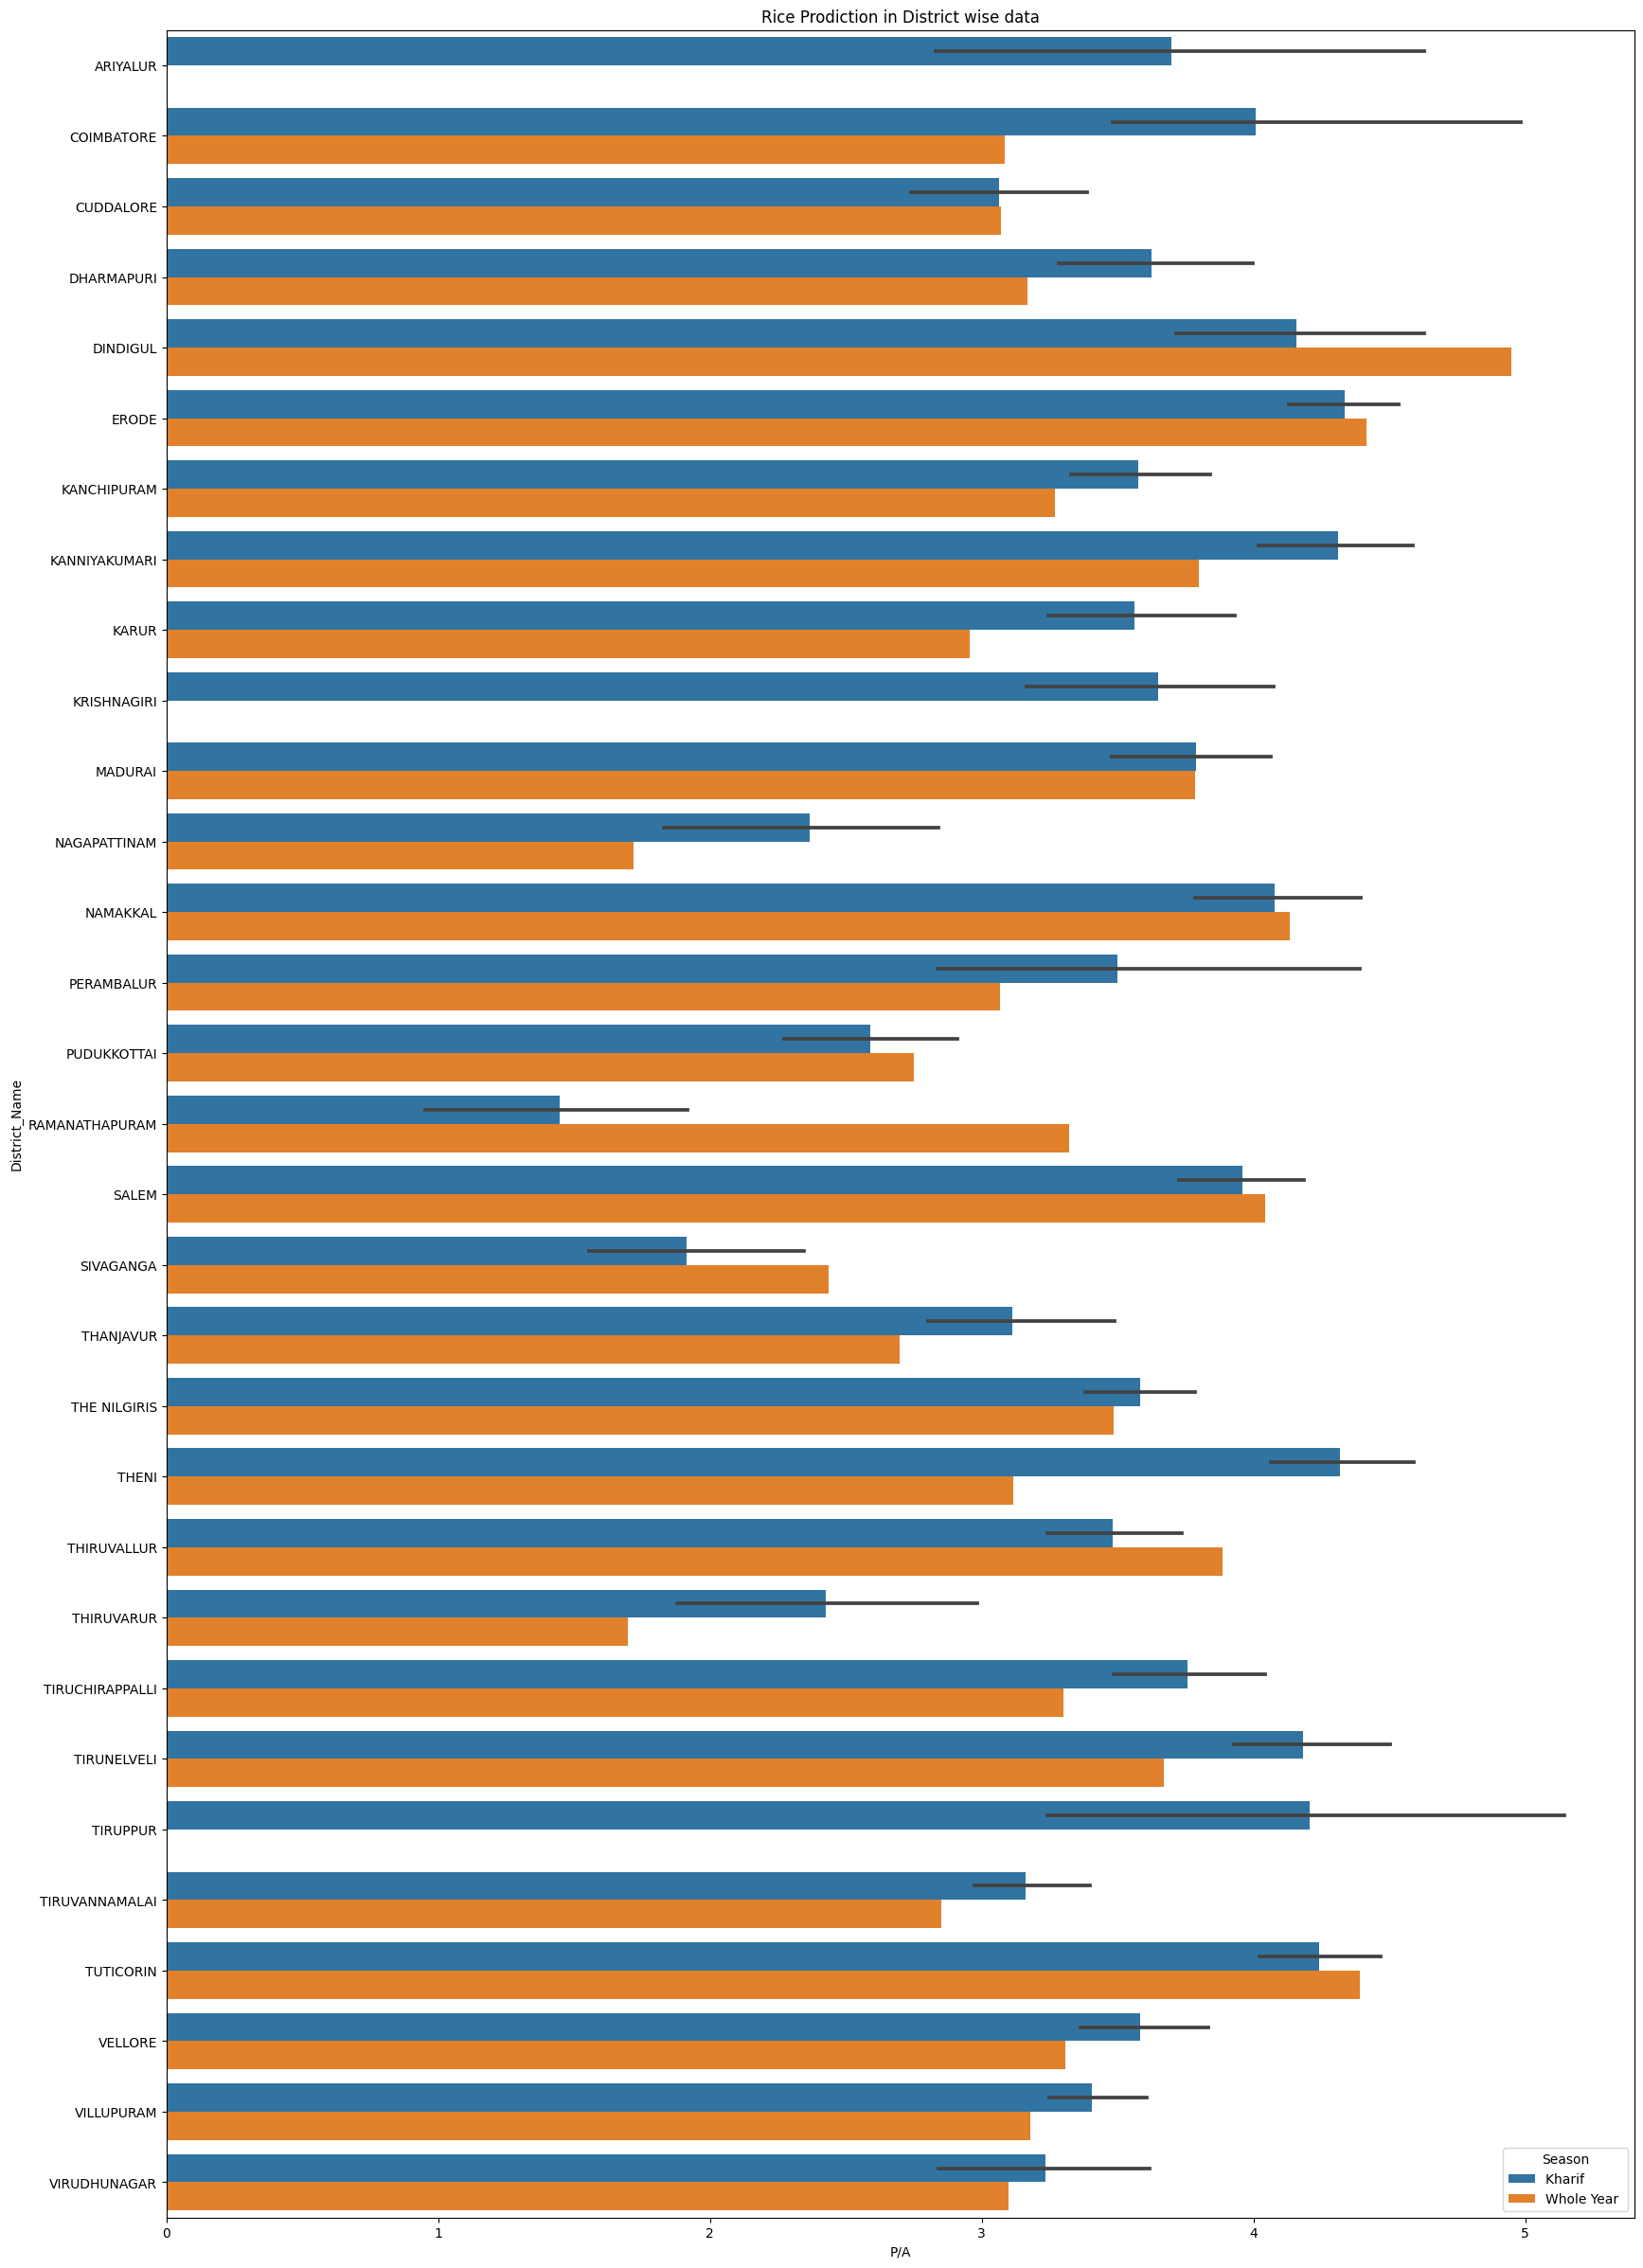

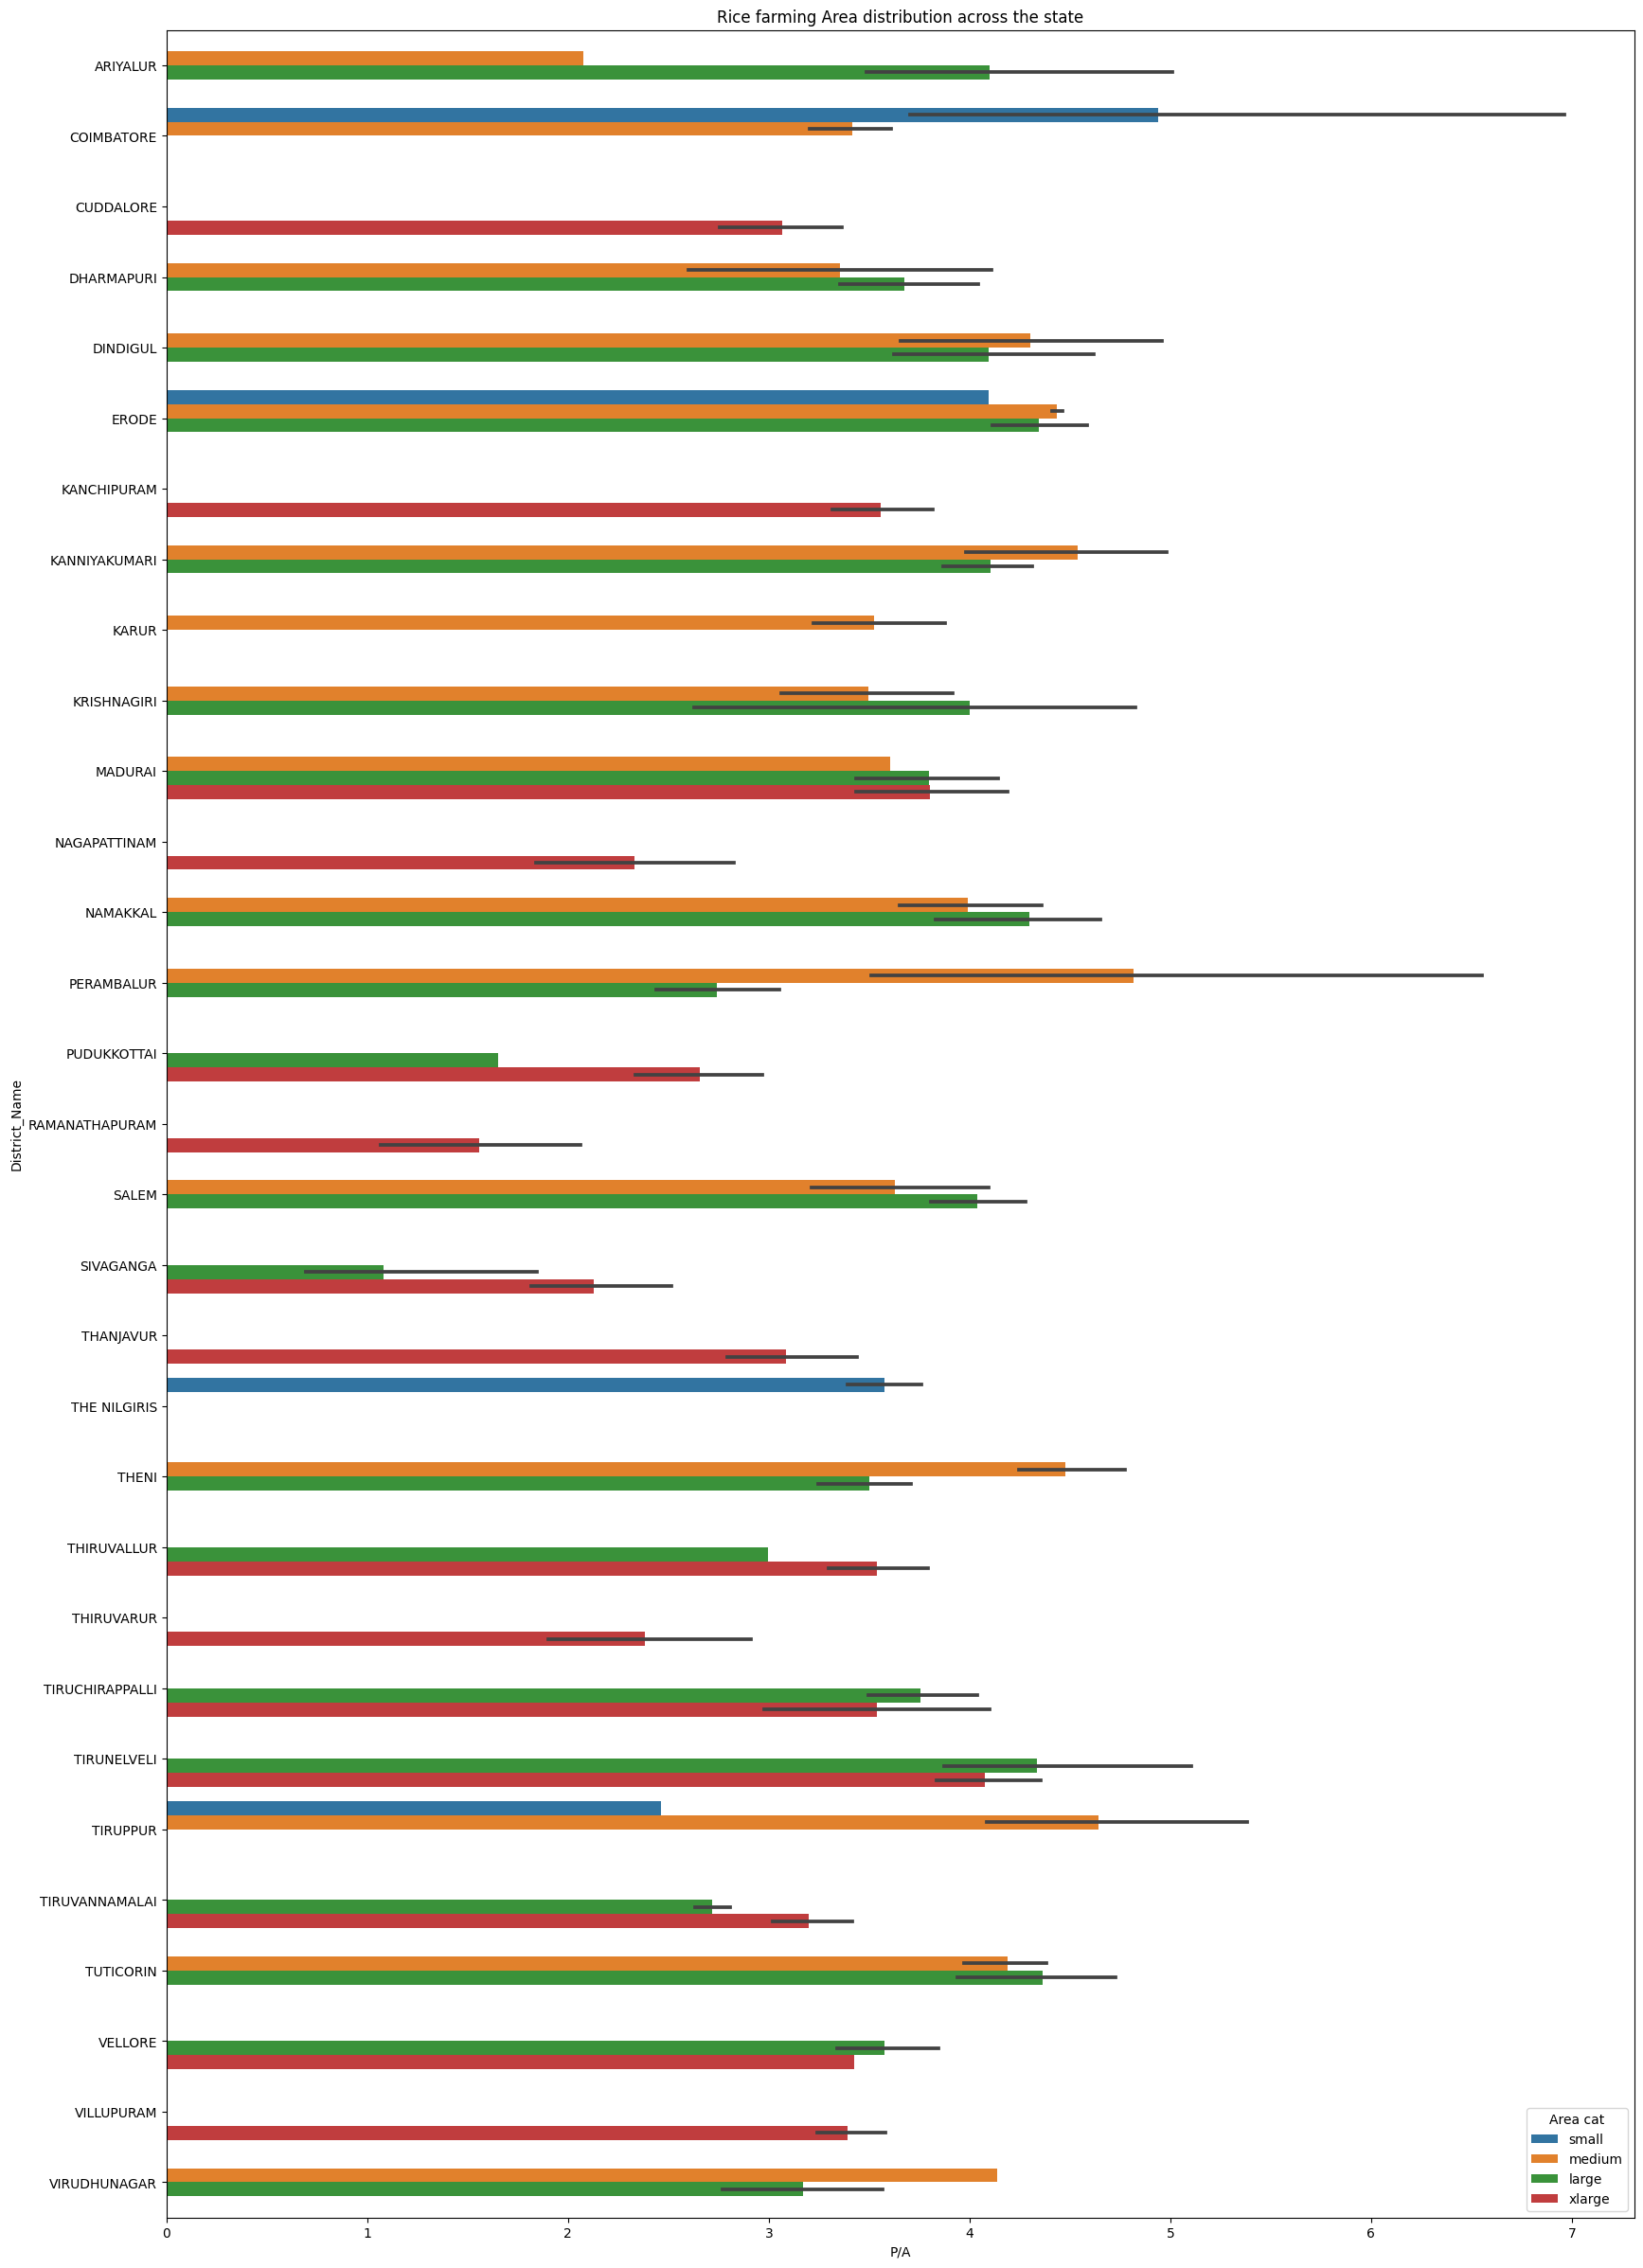

In [132]:
plotfucntion(Rice[(Rice["State_Name"] == "Tamil Nadu")])

In [133]:
Rice["State_Name"].value_counts()

Uttar Pradesh                  1611
Bihar                          1601
Assam                          1356
Odisha                         1341
Karnataka                      1195
West Bengal                     969
Madhya Pradesh                  749
Kerala                          694
Maharashtra                     651
Tamil Nadu                      496
Andhra Pradesh                  481
Gujarat                         343
Punjab                          338
Telangana                       313
Haryana                         300
Rajasthan                       298
Chhattisgarh                    292
Meghalaya                       286
Arunachal Pradesh               273
Uttarakhand                     246
Jharkhand                       227
Nagaland                        190
Jammu and Kashmir               135
Himachal Pradesh                132
Puducherry                      112
Manipur                         107
Mizoram                          94
Tripura                     

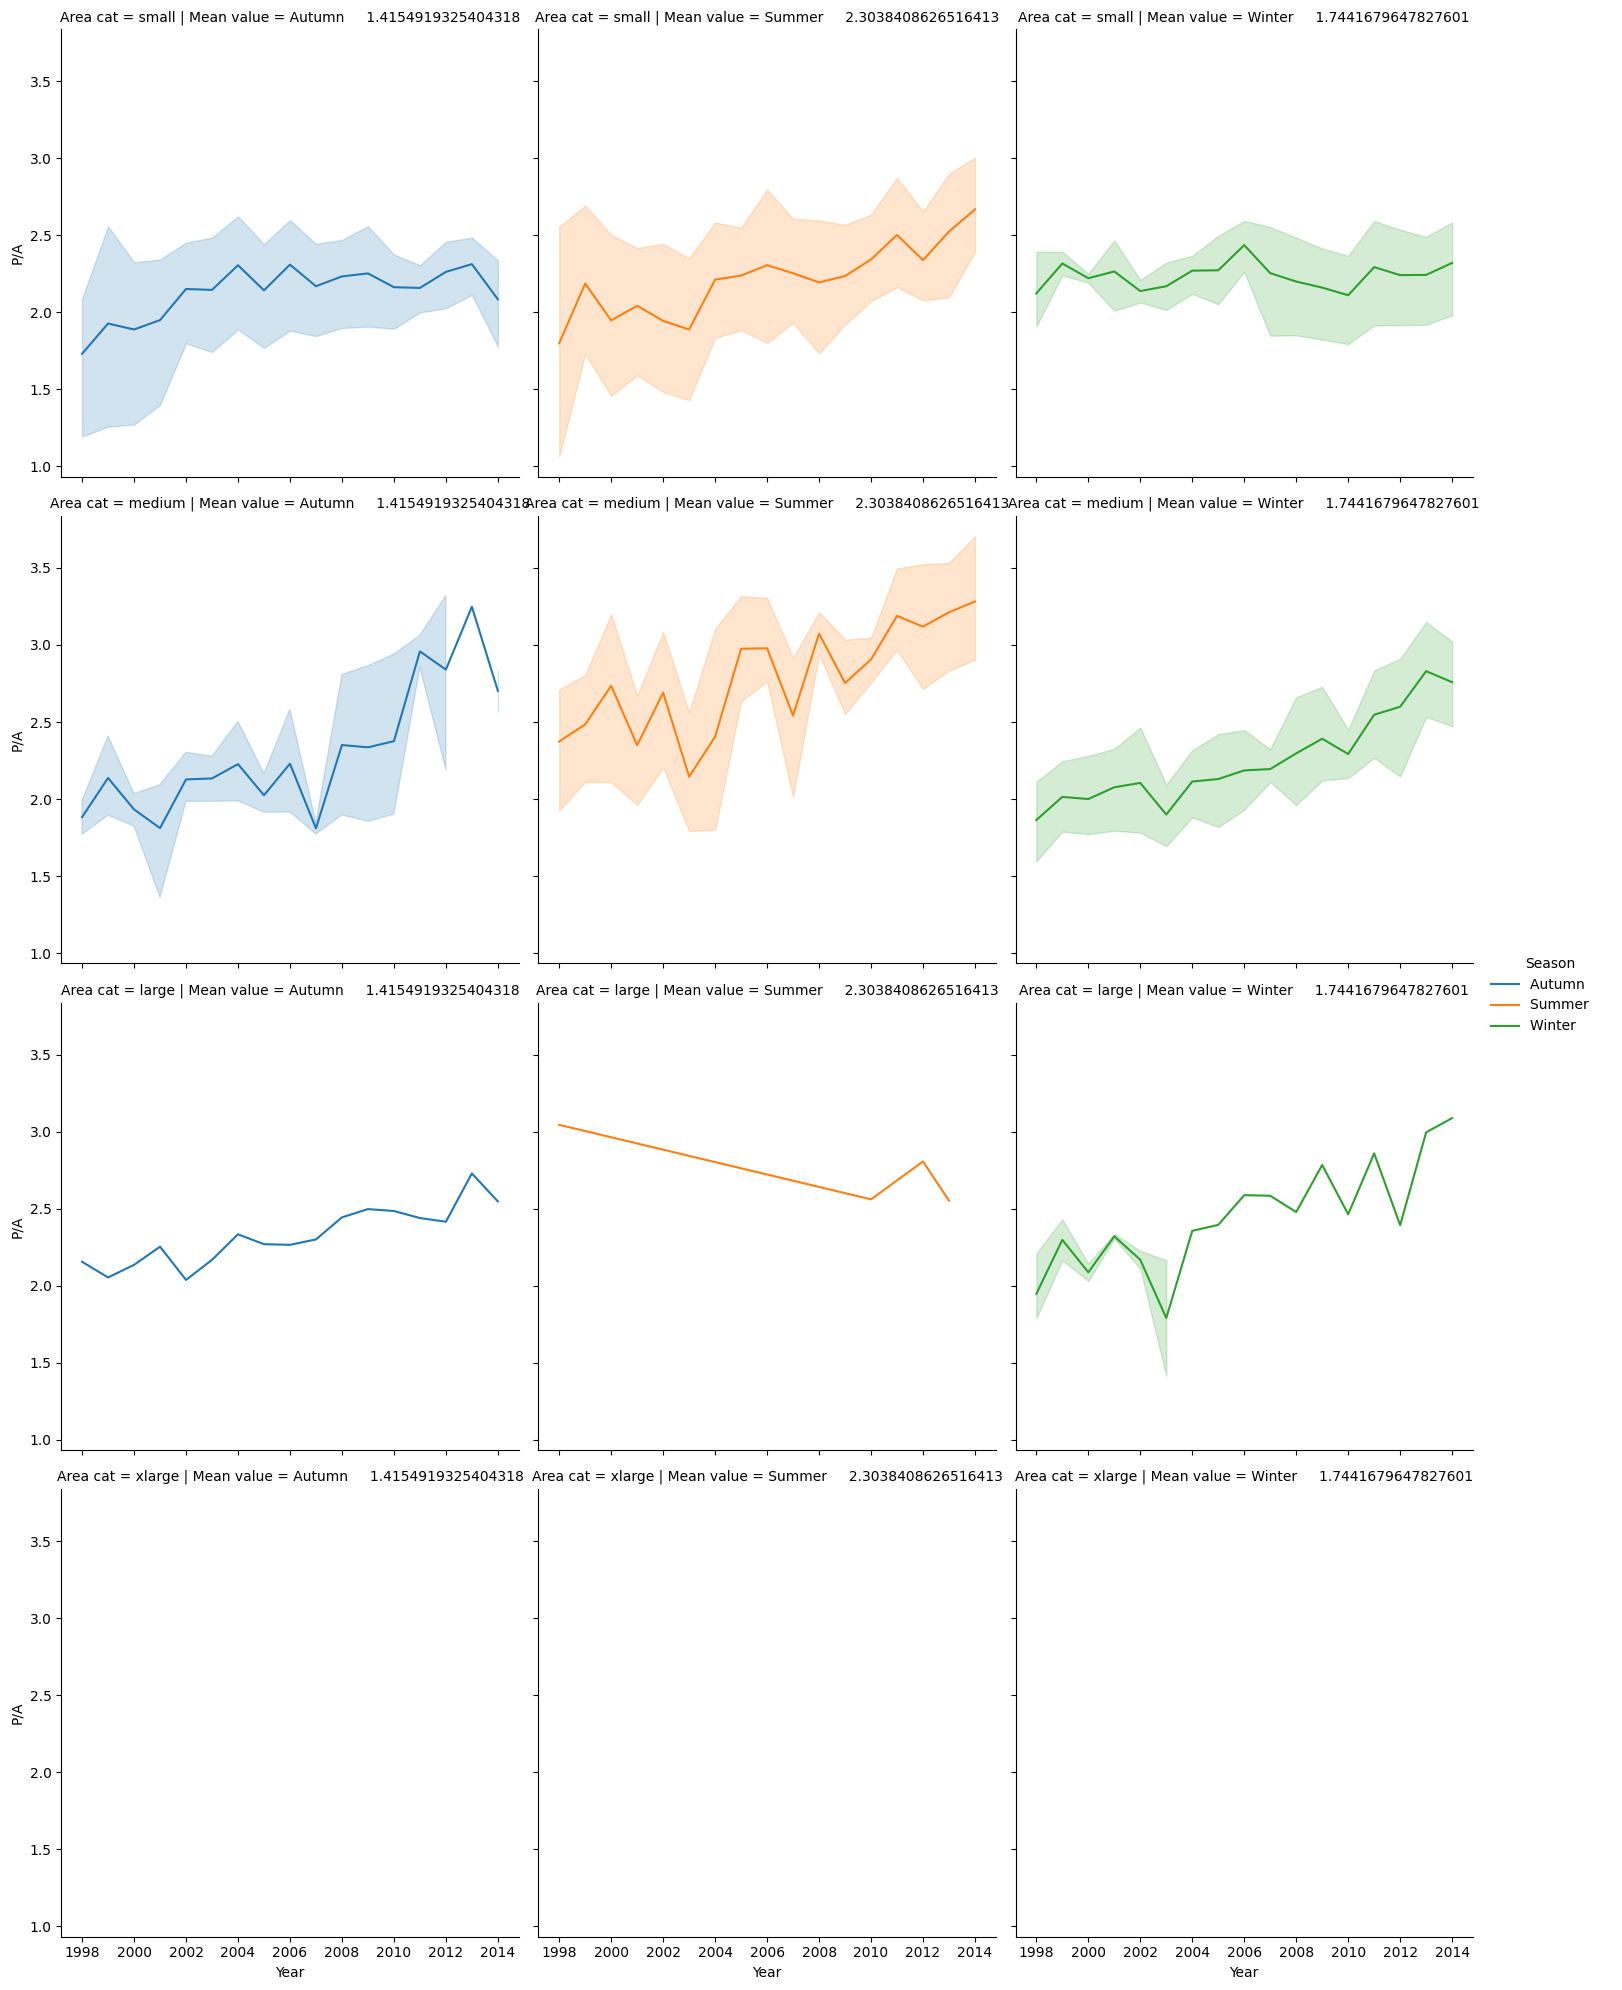

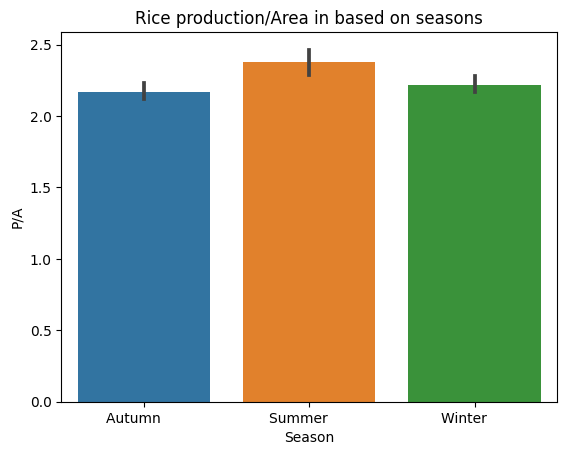

In [137]:
plotfucntion(Rice[(Rice["State_Name"] == "Kerala")])

In [139]:
Rice['Area cat'].cat.categories

Index(['small', 'medium', 'large', 'xlarge'], dtype='object')

In [140]:
Rice['Area cat'].cat.rename_categories(["small"])

index
2            NaN
12           NaN
18           NaN
27           NaN
36           NaN
           ...  
246049       NaN
246052    xlarge
246058       NaN
246086       NaN
246089    xlarge
Name: Area cat, Length: 15081, dtype: category
Categories (3, object): ['medium' < 'large' < 'xlarge']